# Behaviour of the S&P500 in the close

In [142]:
import sys
sys.executable # Check in which virtual environment I am operating

'/Users/Armellini1/opt/anaconda3/envs/finenv/bin/python'

In [143]:
import numpy as np
import pandas as pd
# Module to retrieve data on financial instruments (similar to 'yahoo finance')
import yfinance as yf 
import matplotlib
from matplotlib import pyplot as plt
import datetime

## Import data

In [144]:
df = yf.download(tickers='^GSPC', period='1mo', interval='5m')
df.drop(columns=['Adj Close', 'Open', 'High', 'Low'], inplace = True)
df.tail(7)

[*********************100%***********************]  1 of 1 completed


,Close,Volume
Datetime,,
2020-04-08 15:25:00-04:00,2744.969971,41961752
2020-04-08 15:30:00-04:00,2742.629883,58001097
2020-04-08 15:35:00-04:00,2738.780029,52294954
2020-04-08 15:40:00-04:00,2740.760010,61667428
2020-04-08 15:45:00-04:00,2743.110107,64274164
2020-04-08 15:50:00-04:00,2756.389893,138054327
2020-04-08 15:55:00-04:00,2748.580078,189798923


## Change over the last 30 min

In [145]:
df['30min Change'] = (df['Close'] - df['Close'].shift(6)) / df['Close'].shift(6)
df.tail(7)

,Close,Volume,30min Change
Datetime,,,
2020-04-08 15:25:00-04:00,2744.969971,41961752,0.000036
2020-04-08 15:30:00-04:00,2742.629883,58001097,-0.002179
2020-04-08 15:35:00-04:00,2738.780029,52294954,-0.004087
2020-04-08 15:40:00-04:00,2740.760010,61667428,-0.000762
2020-04-08 15:45:00-04:00,2743.110107,64274164,-0.001060
2020-04-08 15:50:00-04:00,2756.389893,138054327,0.006437
2020-04-08 15:55:00-04:00,2748.580078,189798923,0.001315


In [146]:
df_last_30_min = df[df.index.time == datetime.time(15, 55)].copy()
df_last_30_min.tail()

,Close,Volume,30min Change
Datetime,,,
2020-04-02 15:55:00-04:00,2525.679932,194479787,0.008940
2020-04-03 15:55:00-04:00,2488.570068,190385642,0.002942
2020-04-06 15:55:00-04:00,2661.149902,260822416,0.008955
2020-04-07 15:55:00-04:00,2658.239990,175753205,-0.003229
2020-04-08 15:55:00-04:00,2748.580078,189798923,0.001315


In [147]:
df_last_30_min.index = df_last_30_min.index.map(lambda x: x.date)
df_last_30_min.rename(columns={'Close': 'Last 30min Close', '30min Change': 'Last 30min Change', 'Volume': 'Last 30min Volume'}, inplace=True)
df_last_30_min.tail()

,Last 30min Close,Last 30min Volume,Last 30min Change
2020-04-02,2525.679932,194479787,0.008940
2020-04-03,2488.570068,190385642,0.002942
2020-04-06,2661.149902,260822416,0.008955
2020-04-07,2658.239990,175753205,-0.003229
2020-04-08,2748.580078,189798923,0.001315


## Change over the next day

In [148]:
df_daily = yf.download(tickers='^GSPC', period='1mo', interval='1d')
df_daily.drop(columns=['Adj Close', 'Open', 'High', 'Low'], inplace = True)
df_daily['Change'] = (df_daily['Close'] - df_daily['Close'].shift(1)) / df_daily['Close'].shift(1)
df_daily.tail()

[*********************100%***********************]  1 of 1 completed


,Close,Volume,Change
Date,,,
2020-04-02,2526.899902,6454990000,0.022829
2020-04-03,2488.649902,6087190000,-0.015137
2020-04-06,2663.679932,6391860000,0.070331
2020-04-07,2659.409912,7040720000,-0.001603
2020-04-08,2749.979980,5856370000,0.034056


## Putting data side by side: day change, and last 30 min of day before

In [149]:
mdf = pd.merge(left=df_daily, right=df_last_30_min, left_index=True, right_index=True)
mdf.drop(columns=['Last 30min Close'], inplace=True)
# Re-arrange columns order
mdf = mdf[['Close', 'Volume', 'Change','Last 30min Change', 'Last 30min Volume']]
mdf.head()

,Close,Volume,Change,Last 30min Change,Last 30min Volume
Date,,,,,
2020-03-09,2746.560059,8423050000,NaN,-0.011033,236972250
2020-03-10,2882.229980,7635960000,0.049396,0.014372,225266337
2020-03-11,2741.379883,7374110000,-0.048868,0.005004,226370312
2020-03-12,2480.639893,8829380000,-0.095113,-0.010802,276863655
2020-03-13,2711.020020,8258670000,0.092871,0.047004,0


In [150]:
mdf[['Last 30min Change', 'Last 30min Volume']] = mdf[['Last 30min Change', 'Last 30min Volume']].shift(1)
mdf.rename(columns={'Last 30min Change': 'Last 30m Change (d-1)', 
                    'Last 30min Volume': 'Last 30m Volume (d-1)'}, inplace=True)
mdf.head()


,Close,Volume,Change,Last 30m Change (d-1),Last 30m Volume (d-1)
Date,,,,,
2020-03-09,2746.560059,8423050000,NaN,NaN,NaN
2020-03-10,2882.229980,7635960000,0.049396,-0.011033,236972250.0
2020-03-11,2741.379883,7374110000,-0.048868,0.014372,225266337.0
2020-03-12,2480.639893,8829380000,-0.095113,0.005004,226370312.0
2020-03-13,2711.020020,8258670000,0.092871,-0.010802,276863655.0


## Statistics: Percentage of days where the last 30 min trading gave the direction for next trading day

In [194]:
condition = (mdf['Change'] > 0) & (mdf['Last 30m Change (d-1)'] > 0) | (mdf['Change'] < 0) & (mdf['Last 30m Change (d-1)'] < 0)
mdf[condition].head(2)

,Close,Volume,Change,Last 30m Change (d-1),Last 30m Volume (d-1)
Date,,,,,
2020-03-19,2409.389893,7946710000,0.470781,3.912654,283996301.0
2020-03-20,2304.919922,9044690000,-4.335951,-1.089826,214730069.0


In [206]:
percent_last30_predicted_nextD = len(mdf[condition]) / len(mdf)
print(f"Percentage of times where the last 30 min of trading of the day before gave the \n\
direction for the next trading day: {percent_last30_predicted_nextD:.2f}%")

Percentage of times where the last 30 min of trading of the day before gave the 
direction for the next trading day: 0.30%


Plot:

In [209]:
y = [len(mdf[condition]), len(mdf) - len(mdf[condition])]
x = ['Same direction', 'Opposite direction']

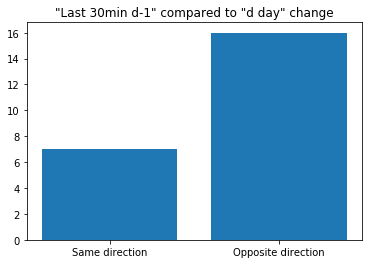

In [215]:
out = plt.bar(x, y)
text = plt.title('"Last 30min d-1" compared to "d day" change')

## OUTPUT Formatting

In [151]:
# Make percentage readable as % (multply by 100)
mdf[['Change', 'Last 30m Change (d-1)']] = mdf[['Change', 'Last 30m Change (d-1)']] * 100
mdf.head()

,Close,Volume,Change,Last 30m Change (d-1),Last 30m Volume (d-1)
Date,,,,,
2020-03-09,2746.560059,8423050000,NaN,NaN,NaN
2020-03-10,2882.229980,7635960000,4.939631,-1.103310,236972250.0
2020-03-11,2741.379883,7374110000,-4.886845,1.437188,225266337.0
2020-03-12,2480.639893,8829380000,-9.511268,0.500407,226370312.0
2020-03-13,2711.020020,8258670000,9.287125,-1.080161,276863655.0


In [162]:
mdf.style.format({'Close': '{:,.2f}', 'Volume': '{:,}', 'Change': '{:.2f}%', 
                  'Last 30m Change (d-1)': '{:.2f}%', 'Last 30m Volume (d-1)': '{:,}'}, na_rep="-")\
                .bar(subset=['Change'],color=['#d65f5f', '#5fba7d'],align='mid')\
                .bar(subset=['Last 30m Change (d-1)'],color=['#d65f5f', '#5fba7d'],align='mid')\
                .set_caption("S&P 500 Daily Change compared to previous day last 30min trading activity")


,Close,Volume,Change,Last 30m Change (d-1),Last 30m Volume (d-1)
Date,,,,,
2020-03-09 00:00:00,"2,746.56","8,423,050,000",-,-,-
2020-03-10 00:00:00,"2,882.23","7,635,960,000",4.94%,-1.10%,"236,972,250.0"
2020-03-11 00:00:00,"2,741.38","7,374,110,000",-4.89%,1.44%,"225,266,337.0"
2020-03-12 00:00:00,"2,480.64","8,829,380,000",-9.51%,0.50%,"226,370,312.0"
2020-03-13 00:00:00,"2,711.02","8,258,670,000",9.29%,-1.08%,"276,863,655.0"
2020-03-16 00:00:00,"2,386.13","7,781,540,000",-11.98%,4.70%,0.0
2020-03-17 00:00:00,"2,529.19","8,358,500,000",6.00%,-2.84%,"289,471,610.0"
2020-03-18 00:00:00,"2,398.10","8,755,780,000",-5.18%,2.12%,0.0
2020-03-19 00:00:00,"2,409.39","7,946,710,000",0.47%,3.91%,"283,996,301.0"


(2300, 2750)

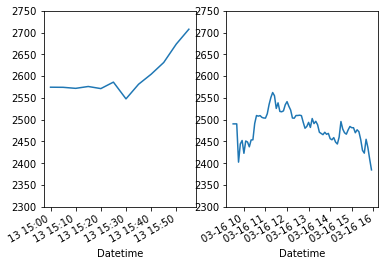

In [182]:
plt.subplot(121)
df.loc['2020-03-13 15:00:00':'2020-03-13 16:00:00', 'Close'].plot()
plt.ylim(2300, 2750)
plt.subplot(122)
df.loc['2020-03-16 9:30:00':'2020-03-16 16:00:00', 'Close'].plot()
plt.ylim(2300, 2750)